## Conceptual Exercises

Q6: Suppose we collect data for a group of students in a statistics class with variables X1 = hours studied, X2 = undergrad GPA, and Y = receive an A. We fit a logistic regression and produce estimated coefficient, βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1.

6a.	Estimate the probability that a student who studies for 40 hours (βˆ1) and has an undergrad GPA of 3.5 (βˆ2) gets an A in the class.

In [473]:
import numpy as np

def logistic_a(x1, x2):
    beta0 = -6
    beta1 = 0.05
    beta2 = 1
    exp = beta0 + beta1*x1 + beta2*x2
    
    return ((np.e)**exp) / (1 + (np.e)**exp)

print(f"{logistic_a(x1=40, x2=3.5):.3f}")

0.378


Notebook Q2: For the given dataset, calculate Overall Model Accuracy, False Positive Rate, Recall, Precision, F1 Score


In [474]:
true_pos = 540
false_pos = 150
true_neg = 200
false_neg = 110

# how much of the data was correctly assigned?
accuracy = (true_pos + true_neg) / (true_pos + false_pos + true_neg + false_neg)
# of the data belonging to class 0, how much was incorrectly assigned?
false_pos_rate = false_pos / (false_pos + true_neg)
# of the data assigned to class 1, how much was relevant (actually belonging)?
precision = true_pos / (true_pos + false_pos)
# of the relevant data (belonging to class 1), how much was correctly assigned?
recall = true_pos / (true_pos + false_neg)
# harmonic mean of precision and recall
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"accuracy: {accuracy:.3f}")
print(f"false pos. rate: {false_pos_rate:.3f}")
print(f"precision: {precision:.3f}")
print(f"recall: {recall:.3f}")
print(f"f1 score: {f1_score:.3f}")

accuracy: 0.740
false pos. rate: 0.429
precision: 0.783
recall: 0.831
f1 score: 0.806


## Applied Exercises
We will be using the College dataset that was used in Chapter 2 for some exploratory data analysis. 

In [475]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='Set2')

In [ ]:
df = pd.read_csv('data/College.csv')
df.rename(columns={df.columns[0]: "Name"}, inplace=True)
df['Accept.Rate'] = df['Accept'] / df['Apps']
df.head(3)

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Accept.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.742169
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.880146
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.768207


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
 19  Accept.R

### 1 – Data Analysis
Create at least 5 graphs of data that highlight differences in class distribution of our target variable, Private. These could be a scatterplot, boxplot, kernel density estimates, swarmplot, violinplot, etc in which the target class, Private, is a different color.

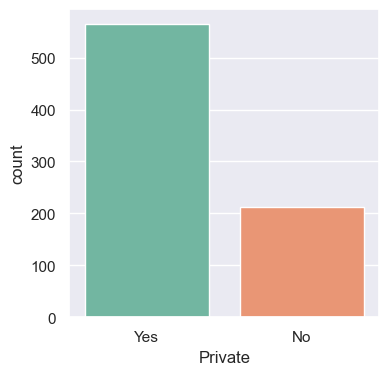

In [478]:
plt.figure(figsize=(4, 4))
sns.countplot(df, x='Private', hue='Private')
plt.show()

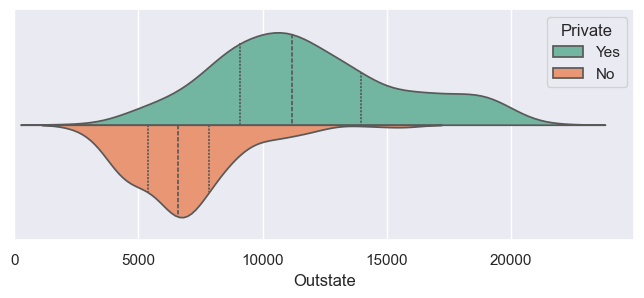

In [479]:
# out of state tuition
plt.figure(figsize=(8,3))
sns.violinplot(data=df, x='Outstate', hue='Private', split=True, inner='quart')
plt.xlim(0)
plt.show()

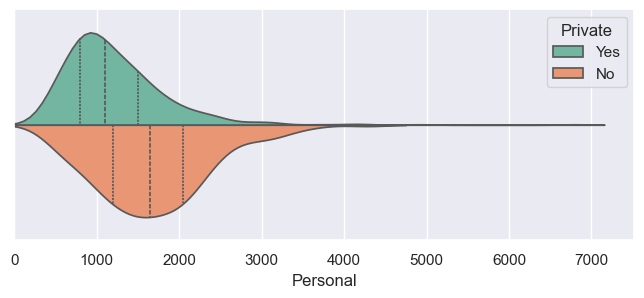

In [480]:
# estimated personal spending per student
plt.figure(figsize=(8,3))
sns.violinplot(data=df, x='Personal', hue='Private', split=True, inner='quart')
plt.xlim(0)
plt.show()

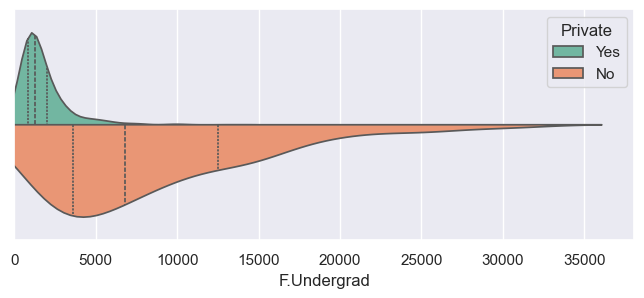

In [481]:
# number of full-time undergrad students
plt.figure(figsize=(8,3))
sns.violinplot(df, x='F.Undergrad', hue='Private', split=True, inner='quart')
plt.xlim(0)
plt.show()

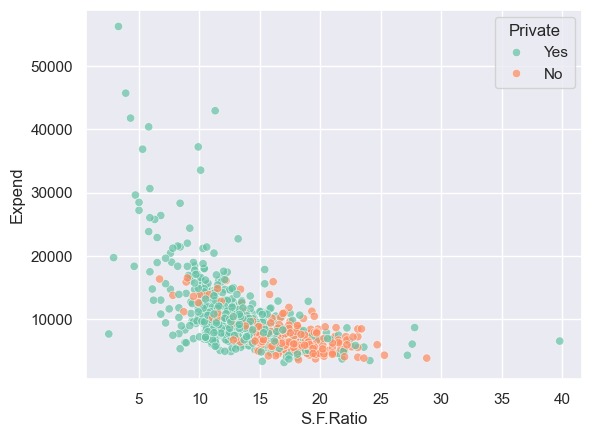

In [482]:
# student/faculty ratio, instructional expenditure per student
sns.scatterplot(df, x='S.F.Ratio', y='Expend', hue='Private', alpha=0.7)
plt.show()

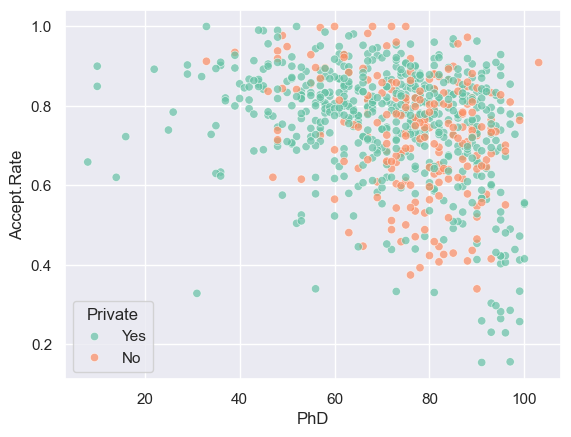

In [483]:
# percent of faculty with PhD, acceptance rate
sns.scatterplot(data=df, x='PhD', y='Accept.Rate', hue='Private', alpha=0.7)
plt.show()

### 2 – Clean Data, Train/Test Split
Drop the Name column. Split the data into a x_train, x_test, y_train, y_test where Private is our y target


In [484]:
df = df.drop('Name', axis=1)

In [485]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Private', axis=1)
y = df['Private']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3 – Logistic Regression
Peform a logistic regression on the training data with Private as the target variable. Print the confusion matrix, and calculate overall accuracy, precision, and recall. Save these results for comparison.

In [486]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [487]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 38   5]
 [  7 106]]
              precision    recall  f1-score   support

          No       0.84      0.88      0.86        43
         Yes       0.95      0.94      0.95       113

    accuracy                           0.92       156
   macro avg       0.90      0.91      0.91       156
weighted avg       0.92      0.92      0.92       156



Do another test/train split and repeat the training and testing process. Were the results (accuracy, precision, recall) similar? Make an argument as to why they were, or weren’t, almost identical. 

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[47  6]
 [ 4 99]]
              precision    recall  f1-score   support

          No       0.92      0.89      0.90        53
         Yes       0.94      0.96      0.95       103

    accuracy                           0.94       156
   macro avg       0.93      0.92      0.93       156
weighted avg       0.94      0.94      0.94       156



In [489]:
'''
The results are similar, which is expected given both splits were done randomly with the same test size.
'''

'\nThe results are similar, which is expected given both splits were done randomly with the same test size.\n'

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=82)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[115   8]
 [ 18 326]]
              precision    recall  f1-score   support

          No       0.86      0.93      0.90       123
         Yes       0.98      0.95      0.96       344

    accuracy                           0.94       467
   macro avg       0.92      0.94      0.93       467
weighted avg       0.95      0.94      0.95       467



In [491]:
'''
Using the same random state and instead adjusting test size also does not result in major changes for this dataset.
'''

'\nUsing the same random state and instead adjusting test size also does not result in major changes for this dataset.\n'

### 4 – LDA
Using the same target and predictors, use Linear Discriminant Analysis to create and evaluate the model (training on X_train, testing on y_test). Print the confusion matrix and accuracy metrics. Are the results better, worse, or similar to LR?

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [493]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 36   7]
 [  6 107]]
              precision    recall  f1-score   support

          No       0.86      0.84      0.85        43
         Yes       0.94      0.95      0.94       113

    accuracy                           0.92       156
   macro avg       0.90      0.89      0.89       156
weighted avg       0.92      0.92      0.92       156



In [494]:
'''
Results are very similar to logistic regression; some slight variations in precision and recall.
'''

'\nResults are very similar to logistic regression; some slight variations in precision and recall.\n'

### 5 – QDA
Repeat the same analysis, but using Quadratic Discriminant Analysis

In [495]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 32  11]
 [  2 111]]
              precision    recall  f1-score   support

          No       0.94      0.74      0.83        43
         Yes       0.91      0.98      0.94       113

    accuracy                           0.92       156
   macro avg       0.93      0.86      0.89       156
weighted avg       0.92      0.92      0.91       156



In [496]:
'''
QDA performs similarly to LDA and LR overall; considerably lower recall and higher precision for 'No' class
'''

"\nQDA performs similarly to LDA and LR overall; considerably lower recall and higher precision for 'No' class\n"

### 6 – Naïve Bayes
Once more but with Naïve bayes

In [497]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 34   9]
 [  4 109]]
              precision    recall  f1-score   support

          No       0.89      0.79      0.84        43
         Yes       0.92      0.96      0.94       113

    accuracy                           0.92       156
   macro avg       0.91      0.88      0.89       156
weighted avg       0.92      0.92      0.91       156



In [498]:
'''
NB also performs similarly; slightly more balanced precison and recall than QDA
'''

'\nNB also performs similarly; slightly more balanced precison and recall than QDA\n'

### 7 – KNN
Last test will be to use nearest neighbor. Remember that you need to scale your predictors because nearest neighbor uses distance calculations.


In [499]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 35   8]
 [  6 107]]
              precision    recall  f1-score   support

          No       0.85      0.81      0.83        43
         Yes       0.93      0.95      0.94       113

    accuracy                           0.91       156
   macro avg       0.89      0.88      0.89       156
weighted avg       0.91      0.91      0.91       156



Try a couple values of k, and record your best confusion matrix/accuracy.

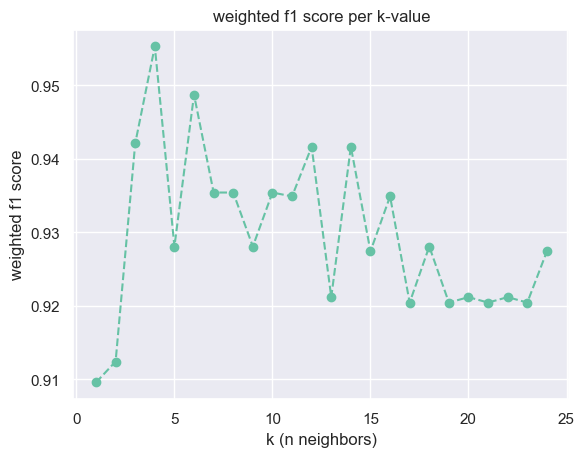

In [500]:
from sklearn.metrics import f1_score

f1_scores = []

for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
plt.plot(range(1, 25), f1_scores, linestyle='--', marker='o')
plt.title('weighted f1 score per k-value')
plt.xlabel('k (n neighbors)')
plt.ylabel('weighted f1 score')
plt.show()

In [501]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"weighted f1 score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

[[ 40   3]
 [  4 109]]
              precision    recall  f1-score   support

          No       0.91      0.93      0.92        43
         Yes       0.97      0.96      0.97       113

    accuracy                           0.96       156
   macro avg       0.94      0.95      0.94       156
weighted avg       0.96      0.96      0.96       156

weighted f1 score: 0.955


In [502]:
'''
k=4 provides the highest f1-score for this sample, and remains reasonably low in terms of model complexity.
'''

'\nk=4 provides the highest f1-score for this sample, and remains reasonably low in terms of model complexity.\n'

### 8 – Report Findings
Which of your methods produced the best results on our dataset?

In [503]:
'''
KNN with k=4 had best performance with a weighted f1-score of 0.955 (and high performance in other metrics).
'''

'\nKNN with k=4 had best performance with a weighted f1-score of 0.955 (and high performance in other metrics).\n'

Did any of the methods do drastically worse?

In [504]:
'''
None of the methods did 'drastically' worse; QDA and Naive-Bayes had the lowest overall performance by a slight margin.
'''

"\nNone of the methods did 'drastically' worse; QDA and Naive-Bayes had the lowest overall performance by a slight margin.\n"

### 9 – Best Method
Whichever method proved most accurate, use KFold cross validation to calculate the expected accuracy of the model on never before seen data. Remember, you’ll get an accuracy score for each fold, that you store, and then average to get a final score. 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# dataset has more private than non-private schools; using stratified so each fold is balanced
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=82)

knn = KNeighborsClassifier(n_neighbors=4)
X_scaled = scaler.fit_transform(X)

scores = cross_val_score(knn, X_scaled, y, cv=skf, scoring='f1_weighted')
print(f"weighted f1 scores: {np.round(scores, 3)}")
print(f"avg score: {np.mean(scores):.3f}")

weighted f1 scores: [0.899 0.962 0.962 0.962 0.885 0.949 0.908 0.936 0.899 0.908]
avg score: 0.927


Compare this KFold average accuracy score to the previous score (using just a single test/train). Is it better or worse? Argue why.

In [506]:
'''
The average weighted f1 score of KNN is lower for StratifiedKFold (0.927) than the single TTS (0.955).
This may indicate that our particular split had above average 'favorability'; the test subset was fairly similar to the train data.
KFold gives a more generalized estimate of performance, especially when taking the average score of all folds; we should expect performance to be less than 'favorable'.
'''

"\nThe average weighted f1 score of KNN is lower for StratifiedKFold (0.927) than the single TTS (0.955).\nThis may indicate that our particular split had above average 'favorability'; the test subset was fairly similar to the train data.\nKFold gives a more generalized estimate of performance, especially when taking the average score of all folds; we should expect performance to be less than 'favorable'.\n"